<a href="https://colab.research.google.com/github/juanscc2/Laboratorios-Seminario-Big-Data/blob/main/Cars_price_prediction_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Juan Sebastian Cortes Chia-95032
Jhonatan Rios Tapiero-95520
Busqueda Mazda 3



## Data understanding

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Load data

In [2]:
import pandas as pd

file_path = '/content/usedCarsCol_Touring_200624.csv'
cols = ['model', 'price', 'year', 'kms', 'color', 'fueltype']

# Adjust the separator if necessary
data = pd.read_csv(file_path, sep=',', names=cols, header=0, encoding='latin-1')
print(data.shape)
data.head()



(52, 6)


,model,price,year,kms,color,fueltype
0,Mazda 3 2.0 Touring,$57.000.000,2016,92.0,Azul,Gasolina
1,Mazda CX-5 2.5 Grand Touring Lx,$79.800.000,2016,82.0,Rojo,Gasolina
2,Mazda 3 GRAND TOURING,$68.900.000,2017,41.0,Plateado,Gasolina
3,Mazda 3 2.0 Grand Touring,$59.000.000,2015,77.0,Azul,Gasolina
4,Mazda CX-30 2.0 Touring MT,$95.000.000,2023,16.0,Blanco,Gasolina


### Verify data types

In [3]:
data.dtypes

model        object
price        object
year          int64
kms         float64
color        object
fueltype     object
dtype: object

### Count unique values for each variable

In [4]:
data.nunique()

model       45
price       47
year        12
kms         30
color        6
fueltype     2
dtype: int64

In [5]:
print(data['model'].unique().tolist())
print(data['price'].unique().tolist())
print(data['year'].unique().tolist())
print(data['kms'].unique().tolist())
print(data['color'].unique().tolist())
print(data['fueltype'].unique().tolist())

['Mazda 3 2.0 Touring', 'Mazda CX-5 2.5 Grand Touring Lx', 'Mazda 3 GRAND TOURING', 'Mazda 3 2.0 Grand Touring', 'Mazda CX-30 2.0  Touring MT', 'Mazda 2 Grand Touring Lx Carbon 2.0 Modelo 2025', 'Mazda cx-50 2.5 Grand Touring Awd', 'Mazda cx-50 2.5 Grand Touring 4X2', 'Mazda 3 Touring  2000cc At Aa', 'Mazda Cx-5 Touring 2.0 4x2 2025/mz 127/vf', 'Mazda 2 Sport Touring Automatico Ipm Cuero 2025', 'Mazda 6 2.5 Grand Touring Lx', 'Mazda Cx-5 Grand Touring 4x4  CarbÃ³n Edition ', 'Mazda 2 Sedan Touring Automatico PaÃ±o Ipm 2025 ', 'Mazda 3 Touring Automatico Hibrido 2025 New!!', 'Mazda Cx-30 Touring Hibrida At 2025 Mz/127/vf', 'Mazda 3 Grand Touring Lx Carbon Edition/ 170/ Lc', 'Mazda 3 2.0 Sport Grand Touring', 'Benelli Trk 251', 'Mazda Miata 2.0 Mx-5 Sport Prht 167 hp', 'Mazda CX-30 2.0 Grand Touring At', 'Mazda 3 2.0 Sport Grand Touring Lx', 'Mazda CX-9 2.5 Grand Touring Signature', 'Mazda CX-60 3.3 Grand Touring Signature Hibrido Ligero', 'Mazda 6 2.5 Grand Touring Lx 185 hp', 'Mazda 3 

### Data transformation

In [6]:
# Copy data and remove model variable
datacc = data
datacc = datacc.drop(['model'], axis=1)
datacc.shape

(52, 5)

#### Transform $price$ to numerical

In [7]:
datacc['price'] = datacc['price'].str.replace(r'[$.]', '', regex=True).astype(int)

##### Transform $kms$ to numerical

In [8]:
# Elimina puntos decimales en la columna 'kms'
datacc['kms'] = datacc['kms'].astype(str).str.replace(r'[.]', '', regex=True).astype(int)


In [9]:
datacc.replace({'kms': {'Publicado': 0}}, inplace=True)

In [10]:
datacc['kms'] = datacc['kms'].replace('[.]','',regex=True).astype(int)

##### Transform categorical variables to dummies: $year$ and $fuel type$

In [11]:
# Object to categorical
datacc['color'] = datacc['color'].astype('category')
datacc['fueltype'] = datacc['fueltype'].astype('category')
datacc.dtypes

price          int64
year           int64
kms            int64
color       category
fueltype    category
dtype: object

In [12]:
# Convert to dummies
# Convert category to codes
datacc['color']  = pd.Categorical(datacc['color']).codes
datacc['fueltype']  = pd.Categorical(datacc['fueltype']).codes
datacc.head()

,price,year,kms,color,fueltype
0,57000000,2016,920,0,0
1,79800000,2016,820,5,0
2,68900000,2017,410,4,0
3,59000000,2015,770,0,0
4,95000000,2023,160,1,0


## Data Exploration

In [13]:
# Descriptive statistics
datacc.describe()[['price','year','kms']]

,price,year,kms
count,5.200000e+01,52.000000,52.000000
mean,1.081321e+08,2021.403846,22559.634615
std,5.602188e+07,3.593347,138616.430757
min,1.690000e+07,2011.000000,0.000000
25%,7.500000e+07,2019.000000,0.000000
50%,8.807000e+07,2023.000000,180.000000
75%,1.340250e+08,2024.000000,782.500000
max,2.826000e+08,2025.000000,999999.000000


#### Histograms

Text(0.5, 1.0, '$kms$')

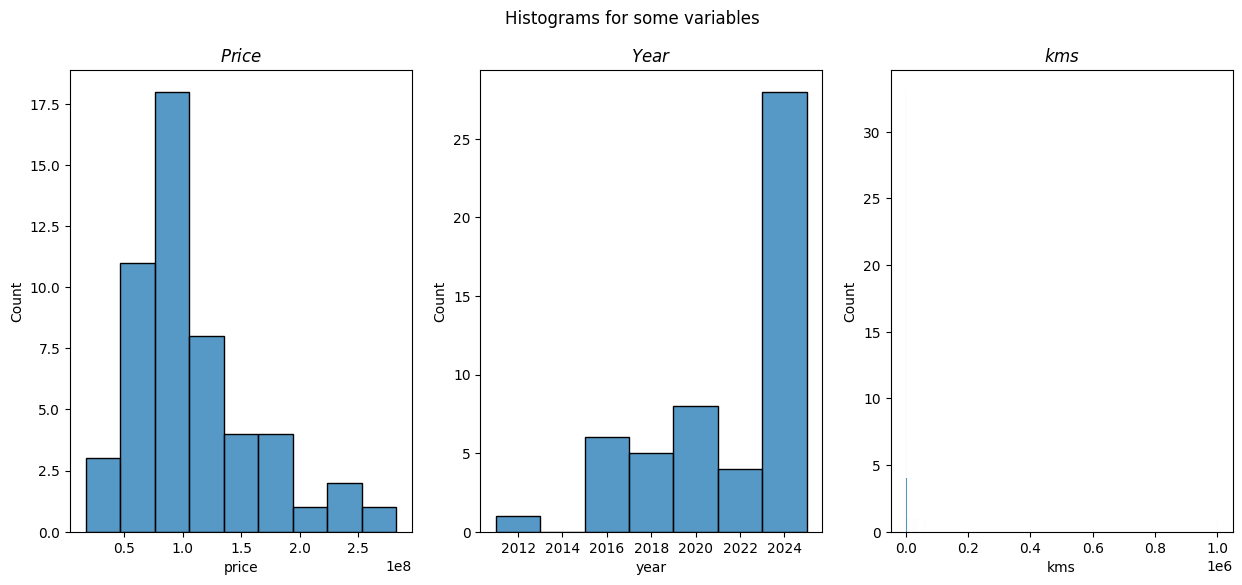

In [14]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

En el histrograma, podemos ver la siguiente información acerca de las variables: Precio, Año y Kilómetros (Kms).

Precio: El histograma muestra una tendencia en la que los precios más bajos son más frecuentes. Esto indica que hay más elementos (probablemente vehículos) con precios bajos en el conjunto de datos. La escala del eje x sugiere que los precios están en alguna unidad multiplicada por 108

Año: Este histograma muestra la distribución de los años. Hay picos notables en ciertos años, lo que sugiere que esos años tienen más ocurrencias dentro del conjunto de datos. Esto podría indicar los años en los que se vendieron o fabricaron más vehículos.

Kilómetros (Kms): Este histograma muestra que los vehículos con menor kilometraje son más frecuentes en el conjunto de datos. La escala del eje x sugiere que la distancia recorrida está en kilómetros multiplicada por 106

#### Boxplots

<Axes: >

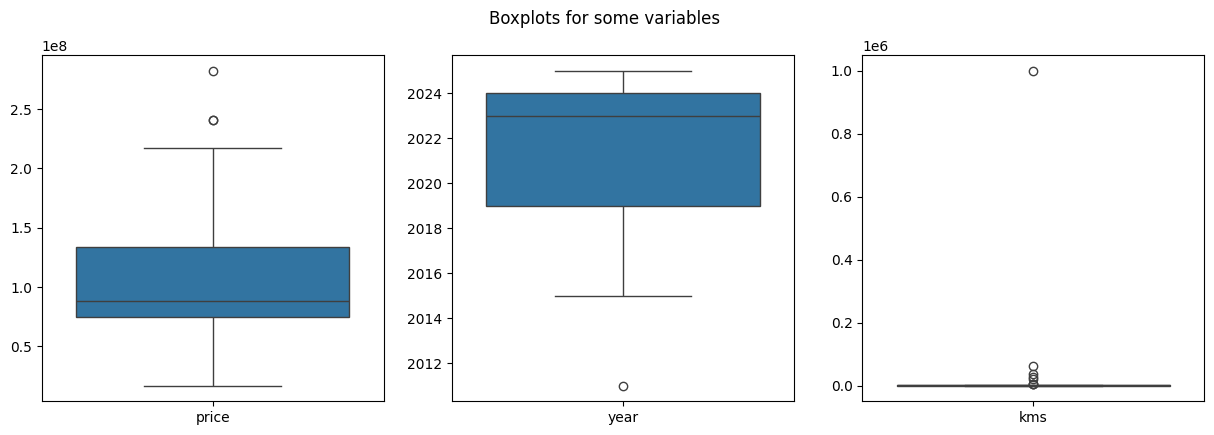

In [15]:
### Boxplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4.5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Ouliers treatment
_https://www.statology.org/remove-outliers-python/_  
_https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6_  
_https://www.scribbr.com/statistics/outliers/_  
_https://www.statology.org/remove-outliers/_  

<Axes: >

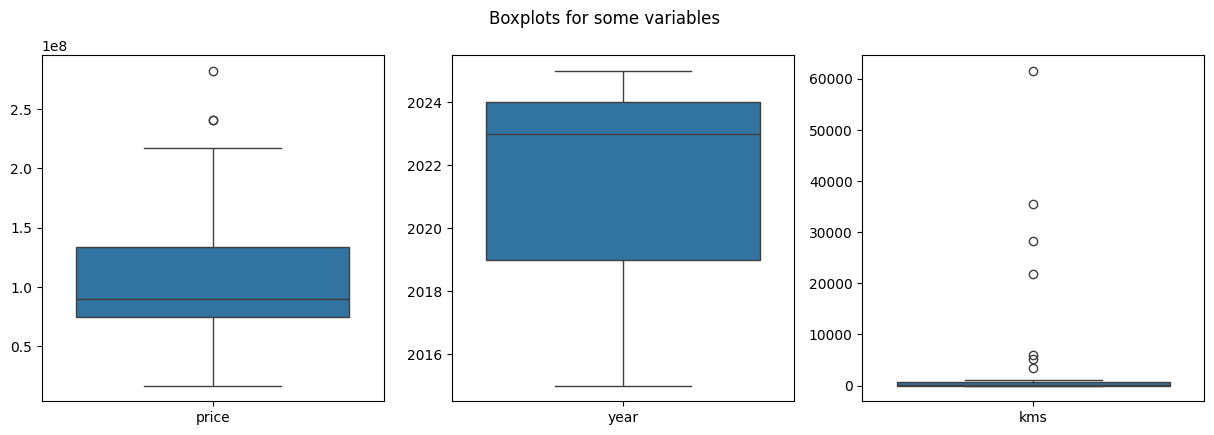

In [17]:
# Z score to eliminate outliers of 'year' and 'kms'
from scipy import stats

#find absolute value of z-score for each observation of 'kms'
z2 = np.abs(stats.zscore(datacc['kms']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc.kms[(z2>2)].index
datacc = datacc.drop(toremove)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4.5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

Text(0.5, 1.0, '$kms$')

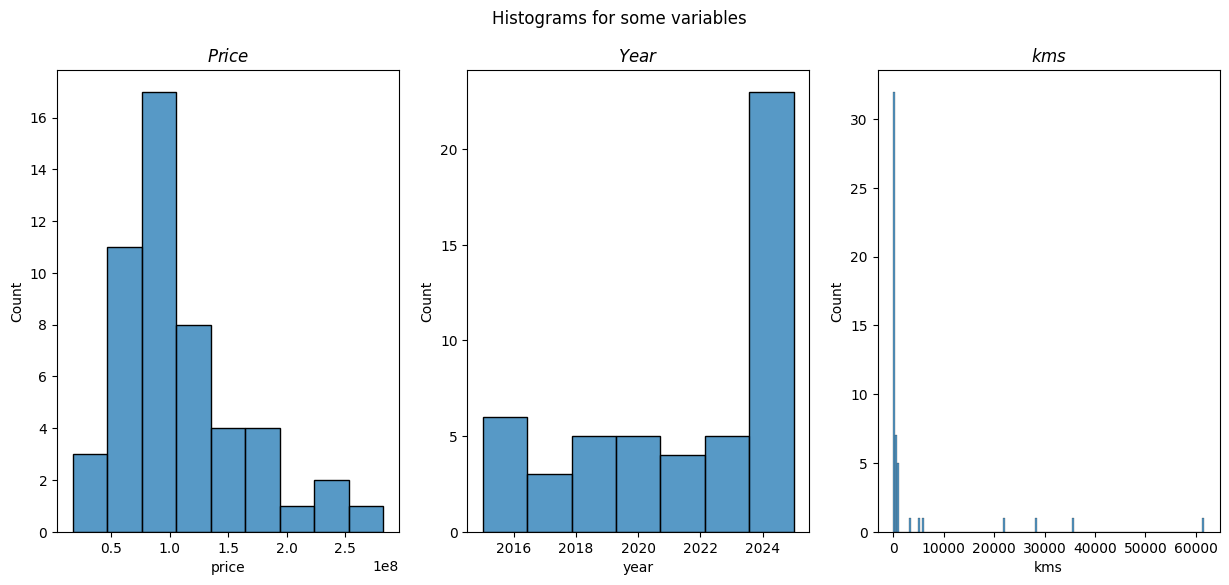

In [18]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

### EDA (Exploratory Data Analysis)

#### Correlations

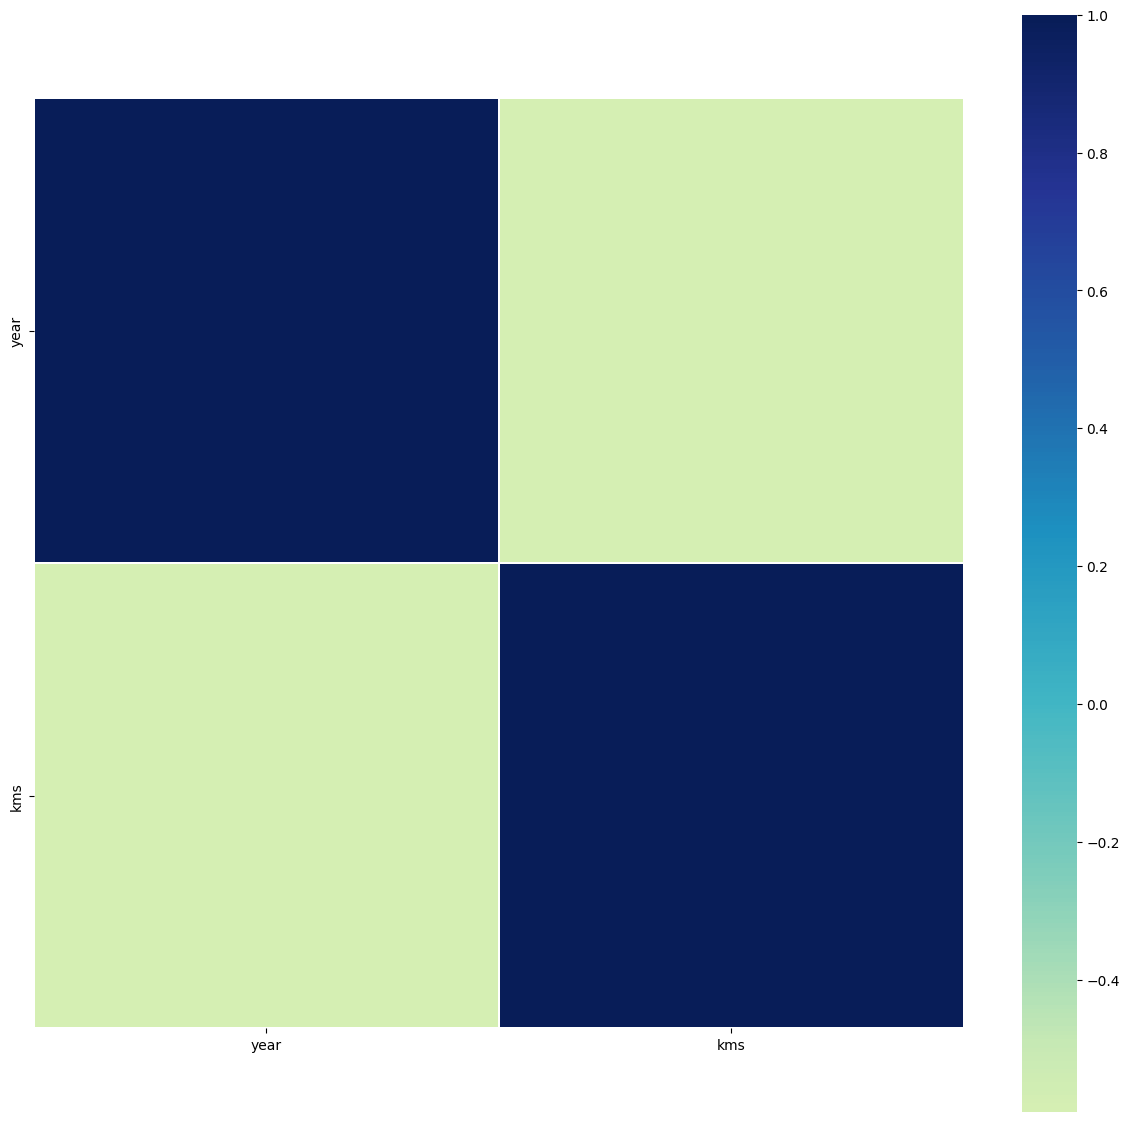

In [20]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

# Definimos X como el subconjunto de 'data' que contiene las columnas 'year' y 'kms'
X = data[['year', 'kms']]

# Ahora puedes llamar a tu función
correlation_heatmap(X)

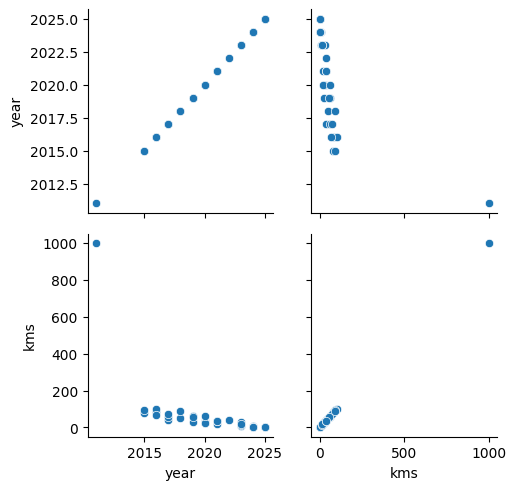

In [21]:
g = sns.PairGrid(X[['year', 'kms']])
g.map(sns.scatterplot)

## Modeling: machine learning

### Libraries

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle

### Data partitioning


In [23]:
X = datacc.copy()
X = X.drop(['price'], axis=1)
print(X.shape)

Y = pd.DataFrame()
Y = datacc['price']
print(Y.shape)

(51, 4)
(51,)


In [24]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(51, 4)

In [25]:
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.20,
                                         random_state=42)

### Multivariate lineal regression

In [26]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [28]:
# accuracy check
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 54540239.70
MAE: 40189490.00
R2: 0.19


### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [29]:
!pip install lightgbm

In [30]:
import lightgbm as lgb

In [31]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [32]:
# accuracy check
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 51233954.19
MAE: 33982890.29
R2: 0.29


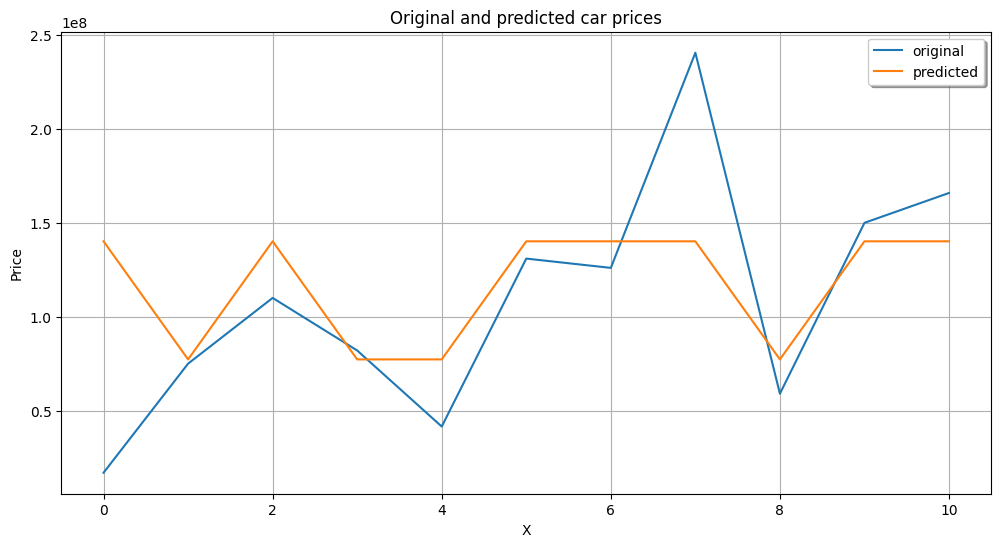

In [33]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted car prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

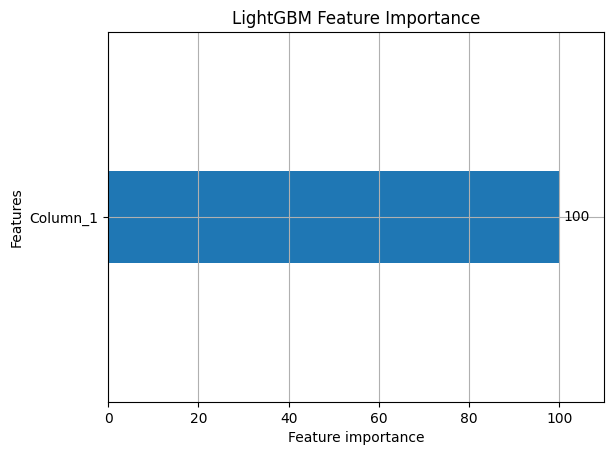

In [34]:
# plotting feature importance
ax = lgb.plot_importance(model2, height=.5, title="LightGBM Feature Importance")


<Axes: >

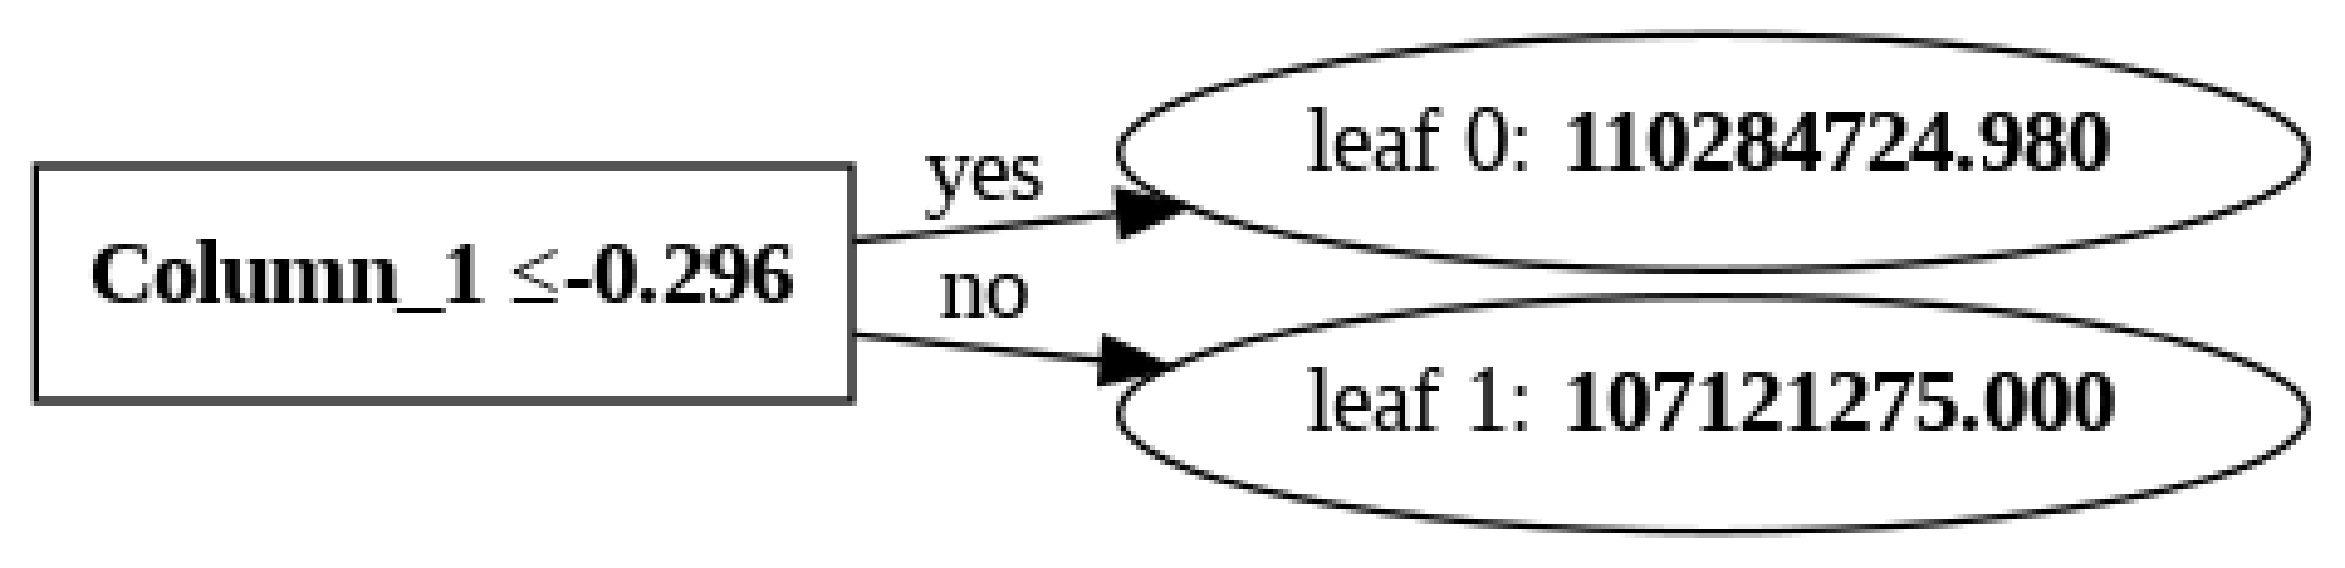

In [35]:
lgb.plot_tree(model2,figsize=(30,40))

### Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [38]:
# accuracy check
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 50285436.50
MAE: 37641769.37
R2: 0.31


**Save the model**

In [39]:
with open('model3.pkl', 'wb') as f:
  pickle.dump(model3, f)

### Xgboost regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [40]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [41]:
#Define model
model4 = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [42]:
#Training
model4.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
#K-fold cross validation
scores = cross_val_score(model4, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: -2.43


In [44]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: -3.23


In [45]:
# Pred
y_pred4 = model4.predict(X_test)

In [46]:
# accuracy check
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 49442799.25
MAE: 39519828.00
R2: 0.33


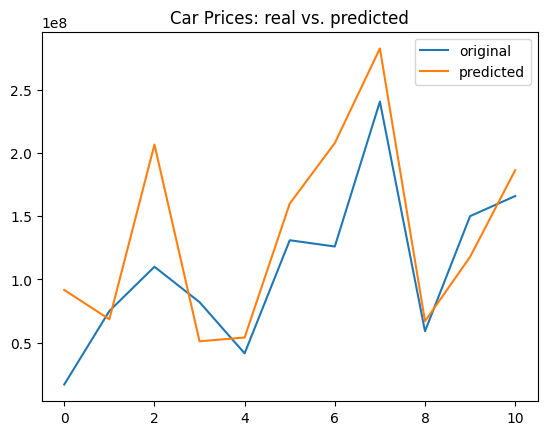

In [47]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Car Prices: real vs. predicted")
plt.legend()
plt.show()